In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#IDtest = test["PassengerId"]
#train.info()
#test.info()

Check out data

In [124]:
#check out the shape of database, index of the database

print("shape of train", train.shape)
print("shape of test",test.shape)
print(train.columns)
train.head()

shape of train (1460, 81)
shape of test (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
#Sale price is our goal for prediction, investated as prioity
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

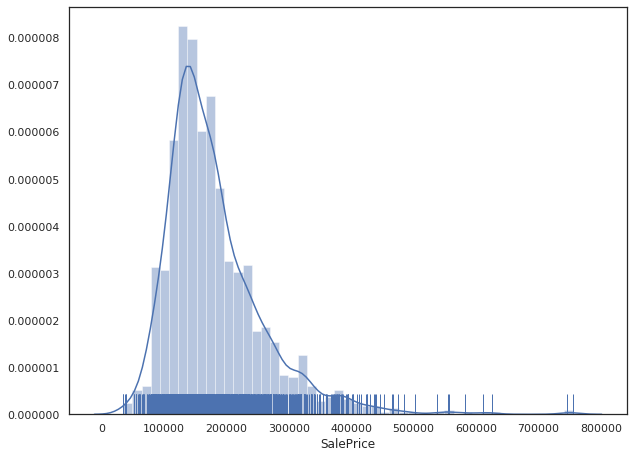

In [126]:
#histogram of the sale price
f, ax = plt.subplots(figsize=(10, 7.5))
sns.distplot(train['SalePrice'], rug=True)

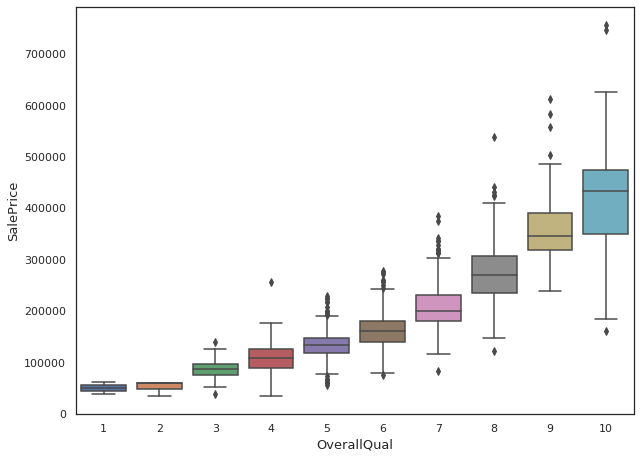

In [127]:
#overalQual is very likiy a feature, which has postive relationship with sale price of a house. 
#so, I plot box plot to investigate.
#as suspected, the higher the score(ie. rated = 10) has higher sale prices

f, ax = plt.subplots(figsize=(10, 7.5))

sns.boxplot(x = train['OverallQual'],y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('OverallQual', fontsize = 13)

plt.show()

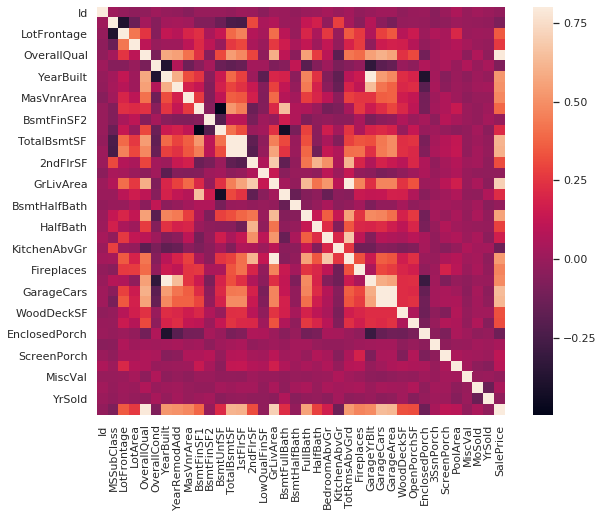

In [128]:
#heated map & correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat, vmax=.8, square=True)

Clearning data - fill nan - Label encode - one-hot encode

In [129]:
#concat the train and test data & change index (dropped ID & sale price)
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
alldata = alldata.reset_index(drop=True)
print(alldata.shape)

(2919, 79)


In [130]:
#count all missing values of each columns
missing=[]
for col in alldata.columns:
    if alldata[col].isnull().sum() > 0:
        missing.append(col)
        print(col, " : ", alldata[col].isnull().sum())

MSZoning  :  4
LotFrontage  :  486
Alley  :  2721
Utilities  :  2
Exterior1st  :  1
Exterior2nd  :  1
MasVnrType  :  24
MasVnrArea  :  23
BsmtQual  :  81
BsmtCond  :  82
BsmtExposure  :  82
BsmtFinType1  :  79
BsmtFinSF1  :  1
BsmtFinType2  :  80
BsmtFinSF2  :  1
BsmtUnfSF  :  1
TotalBsmtSF  :  1
Electrical  :  1
BsmtFullBath  :  2
BsmtHalfBath  :  2
KitchenQual  :  1
Functional  :  2
FireplaceQu  :  1420
GarageType  :  157
GarageYrBlt  :  159
GarageFinish  :  159
GarageCars  :  1
GarageArea  :  1
GarageQual  :  159
GarageCond  :  159
PoolQC  :  2909
Fence  :  2348
MiscFeature  :  2814
SaleType  :  1


In [131]:
# repltace nAn
def fill_nan(data):
    data['LotFrontage'] = data['LotFrontage'].fillna(0)
    data['Alley'] = data['Alley'].fillna('missing')
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    data['BsmtQual'] = data['BsmtQual'].fillna('TA')
    data['BsmtCond'] = data['BsmtCond'].fillna('TA')
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')
    data['Electrical'] = data['Electrical'].fillna('SBrkr')
    data['FireplaceQu'] = data['FireplaceQu'].fillna('missing')
    data['GarageType'] = data['GarageType'].fillna('Attchd')
    data = data.drop('GarageYrBlt', axis=1)
    data['GarageFinish'] = data['GarageFinish'].fillna('Unf')
    data['GarageQual'] = data['GarageQual'].fillna('TA')
    data['GarageCond'] = data['GarageCond'].fillna('TA')
    data['PoolQC'] = data['PoolQC'].fillna('missing')
    data['Fence'] = data['Fence'].fillna('missing')
    data['MiscFeature'] = data['MiscFeature'].fillna('missing')
    data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0]) 
    data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mode()[0])
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mode()[0])
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mode()[0])
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mode()[0])
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mode()[0])
    data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

    return data

In [132]:
alldata = fill_nan(alldata)
print('The amount of nAn in the database:',alldata.isnull().any().sum())
print(alldata.shape)

The amount of nAn in the database: 0
(2919, 78)


Label encoding & one hot encoding

In [133]:
#seprate categorical & continuous values data columns
col_num = alldata.select_dtypes(include = np.number).columns
col_obj = alldata.select_dtypes(include = 'object').columns

print('col_num: ', col_num)
print('col_obj: ', col_obj)

col_num:  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
col_obj:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'C

In [134]:
#Label encode the columns of continuous values
from sklearn.preprocessing import LabelEncoder


lab_col = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'MSZoning']

for c in lab_col:
    lbl = LabelEncoder() 
    lbl.fit(list(alldata[c].values)) 
    alldata[c] = lbl.transform(list(alldata[c].values))

Transfermate data (feature scaling)

In [135]:
numerical_alldata = [col for col in alldata.columns if alldata[col].dtype != 'O']

In [136]:
from scipy.stats import skew
skew_indx = alldata.skew(axis=0).sort_values(ascending=False)
print(skew_indx.head(10))

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
LandSlope         4.977715
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
dtype: float64


In [137]:
skew_indx = skew_indx[abs(skew_indx) > 0.75]
skew_indx = skew_indx.index
alldata[skew_indx] = np.log1p(alldata[skew_indx])  #還原: alldata[skew_indx].apply(np.expm1)

In [138]:
#one hot encoding for columns with categorical value 
alldata = pd.get_dummies(alldata)

In [139]:
#plot against sale price to see if there is outliner
# continuous = ['LotFrontage','LotArea','MasVnrArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','BsmtFinSF1','ScreenPorch','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','BsmtFinSF','2ndFlrSF','TotalSF','LowQualFinSF','GrLivArea','Porch','BuildingAge']
# plotdd = alldata[:train.shape[0]]
# plotdd['SalePrice'] = train.SalePrice
# rcParams['figure.figsize'] = (15,30)
# fig, axes = plt.subplots(11,2)
# sns.set()
# for i in range(len(continuous)):
#     if i < 11:
#         pp = sns.regplot(data=plotdd, x=continuous[i], y='SalePrice', ax=axes[i,0])
#         pp.set_title('Corr:%.2f' % np.corrcoef(plotdd['SalePrice'],plotdd[continuous[i]])[0,1],size=20)
#     else:
#         pp2 = sns.regplot(data=plotdd, x=continuous[i], y='SalePrice', ax=axes[i-11,1])
#         pp2.set_title('Corr:%.2f' % np.corrcoef(plotdd['SalePrice'],plotdd[continuous[i]])[0,1],size=20)
#     plt.tight_layout()

In [140]:
#take off outliners
# y = train['SalePrice']

# alldata = alldata.drop(plotdd[(plotdd['TotalBsmtSF']>5000) & (plotdd['SalePrice']<300000)].index)
# alldata = alldata.drop(plotdd[(plotdd['1stFlrSF']>4000) & (plotdd['SalePrice']<300000)].index)
# alldata = alldata.drop(plotdd[(plotdd['BsmtFinSF']>5000) & (plotdd['SalePrice']<300000)].index)
# alldata = alldata.drop(plotdd[(plotdd['TotalSF']>10000) & (plotdd['SalePrice']<300000)].index)

# #這裏發現離群值其實都是同一筆，而GrLivArea的離群值多一筆
# alldata = alldata.drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)
# y = train['SalePrice'].drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)

# plotdd = plotdd.drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)

# alldata = alldata.drop(plotdd[(plotdd['BsmtFinSF1']>5000) & (plotdd['SalePrice']<300000)].index)

Training Model

In [141]:
preproced_record_number = 1460
X_train = alldata[:preproced_record_number]
X_test = alldata[1460:]
y_train = y
y_train = np.log1p(y_train)

In [142]:
print(alldata.shape)
print('X_train.shape: ',X_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_train.shape: ',y_train.shape)

(2919, 216)
X_train.shape:  (1460, 216)
X_test.shape:  (1459, 216)
y_train.shape:  (1460,)


In [143]:
#XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"colsample_bytree":0.4603, "gamma":0.0468, 
          "learning_rate":0.05, "max_depth":3, 
          "min_child_weight":1.7817, "n_estimators":2200,
          "reg_alpha":0.4640, "reg_lambda":0.8571,
          "subsample":0.5213, "silent":1,
          "nthread":-1}

model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

In [144]:
from sklearn.model_selection import train_test_split
_X_train, _X_test, _y_train, _y_test = train_test_split(X_train, y_train, test_size = 0.2)
X_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,1.386294,65.0,9.042040,0.693147,1.098612,3,0.0,6,4,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,1.386294,80.0,9.169623,0.693147,1.098612,3,0.0,5,7,...,0,0,0,1,0,0,0,0,1,0


In [145]:
from sklearn import metrics

xgb_f = xgb.XGBRegressor(**params) #the params were tuned using xgb.cv

xgb_f.fit(_X_train, _y_train)
pred= xgb_f.predict(_X_test)

print("MSE: %.2f" % np.mean((pred - _y_test.values.ravel()) ** 2))
print("R Square:", xgb_f.score(_X_test, _y_test))

MSE: 0.02
R Square: 0.9077401234035358


In [146]:
print(pred.shape)

pred1= xgb_f.predict(X_test)
print(pred1.shape)

(292,)
(292, 216)
(1168, 216)
(1459,)


In [152]:
#sub = pd.read_csv('./sample_submission.csv')
test_submission = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred1})
test_submission.to_csv('./test_submission.csv', index = False)